일반적으로 두 개의 클래스 중 하나로 분류하는 문제를 **이진 분류(Binary Classification)**이라고 한다. <br>
이진 분류를 풀기 위한 대표적인 알고리즘이 바로 **로지스틱 회귀(Logistic Regression)**이다.

* 로지스틱 회귀는 이름은 회귀지만 분류 작업에 사용한다.

## <strong> 1. 이진 분류 </strong>

시험 성적에 따라 합격, 불합격이 기재된 데이터가 있다고 가정하자. <br>
이때 그래프는 아래와 같을 것이다.

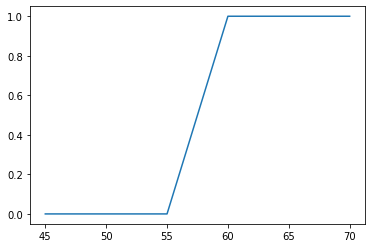

In [1]:
import matplotlib.pyplot as plt

x = [45, 50, 55, 60, 65, 70]
y = [0, 0, 0, 1, 1, 1]
plt.plot(x, y)
plt.show()

위와 같은 **x와 y의 관계를 표현하기 위해서는 직선 함수로 표현하기는 힘들다.** <br>
즉, S자 형태를 표현할 수 있는 함수가 필요하다. <br>
그래서 우리는 **S자 형태를 표현할 수 있는 함수 f를 이용해 $H(x)=f(Wx+b)$라는 가설을 사용할 것이다.**

## <strong> 2. 시그모이드 함수 </strong>

S자 형태로 그래프를 그려주는 함수에는 **시그모이드**가 있다. <br>
수식은 다음과 같다.

$H(x) = sigmoid(Wx+b) = \frac{1}{1+e^{-(Wx+b)}}$

먼저 시그모이드 함수를 정의해보자.

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

<h3> <strong> 2.1 W가 1이고 b가 0인 그래프 </strong> </h3>

W가 1이고 b가 0인 그래프를 그려보자.

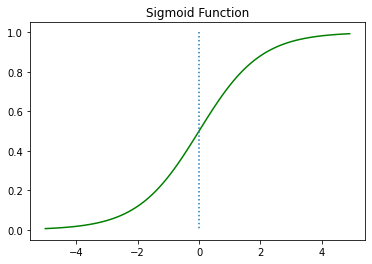

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위처럼 시그모이드 함수는 출력값을 0과 1사이의 값으로 조정한다. <br>
또한 x가 0일 때 0.5의 값을 가진다.

<h3> <strong> 2.2 W값의 변화에 따른 경사도의 변화 </strong> </h3>



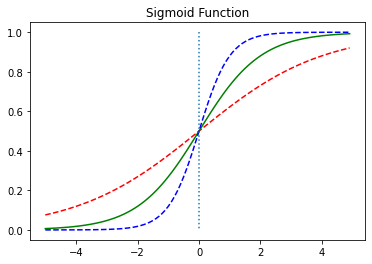

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g')                 # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':')       # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위처럼 W의 값이 변하면 그래프의 경사도 변한다. <br>
즉, W의 값이 커지면 경사가 커지고, 작아지면 경사가 작아진다.

<h3> <strong> 2.3 b값의 변화에 따른 좌, 우 이동 </strong> </h3>

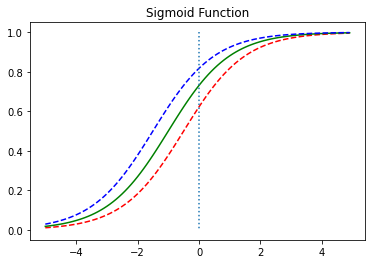

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g')                 # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':')       # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

b의 값에 따라 그래프는 좌우로 이동한다.

<h3> <strong> 2.4 시그모이드 함수를 이용한 분류 </strong> </h3>

시그모이드 함수의 0~1 사이의 출력값을 가지는 특성을 이용하면 분류 작업이 가능하다. <br>
예를 들어, 임계값을 0.5라고 정하면 출력값이 0.5 이상이면 True, 이하면 False로 판단하도록 할 수 있다.

## <strong> 3. 비용 함수 </strong>

이번에는 **비용 함수(cost function)**을 정의해보자.

이전에 사용한 MSE를 비용함수로 사용하면 어떻게 될까? <br>
우리가 정의한 로지스틱 회귀의 가설은 다음과 같다.

$H(x)=sigmoid(Wx+b)$

이때 MSE를 미분하게 되면 선형 회귀와 달리 아래 그림과 유사한 심한 비볼록(non-convex) 그래프가 그려진다.

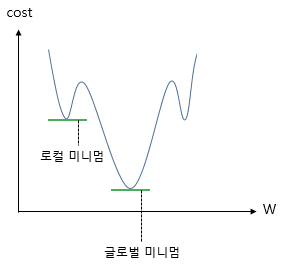

위 그래프에서 경사 하강법을 수행하면 오차가 최소값이 되는 구간에 도착했다고 판단한 구간이 완전히 최소값이 되는 구간이 아닐 수 있다. <br>
이를 **글로벌 미니멈(Global Minimum)**이 아닌 특정 구역에서 최소값인 **로컬 미니멈(Local Minimum)**에 도달했다고 한다.

우리가 사용해야할 비용 함수는 실제값이 1일 때 예측값이 0에 가까워지면 오차가 커져야한다. <br>
이러한 특성을 만족하는 함수가 바로 **로그 함수**다. <br>
아래는 $y=0.5$에 대칭하는 두 개의 로그 함수 그래프다.

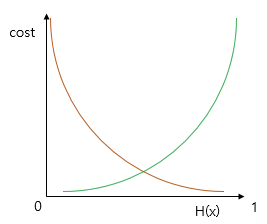

실제값이 1일 때의 그래프는 주황색, 0인 그래프는 초록색 그래프이다. <br>
위 두 개의 함수를 식으로 표현하면 다음과 같다.

$if \,\,\, y=1 → cost(H(x), y) = -log(H(x))$

$if \,\,\, y=0 → cost(H(x), y) = -log(1-H(x))$

이 두 식을 아래와 같이 하나의 식으로 표현할 수 있다.

$cost(H(x), y) = -[ylog(H(x))+(1-y)log(1-H(x))]$

이때 모든 데이터에 대한 오차의 평균을 내주는 함수가 손실함수가 된다.

$cost(H(x), y) = -\frac{1}{n}∑_{i=1}^{n}[y^{i}log(H(x^{i}))+(1-y^{i})log(1-H(x^{i}))]$


즉, 위 손실 함수에 대해 경사 하강법을 수행하면서 최적의 가중치 W를 찾으면 된다.

## <strong> 4. 파이토치로 로지스틱 회귀 구현하기 </strong>

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2, 1), requires_grad=True) # x_data의 크기가 6*2 이므로 크기가 2*1이어야 한다.
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
  hypothesis = torch.sigmoid(x_train.matmul(W)+b)
  cost = -(y_train*torch.log(hypothesis) +
           (1-y_train)*torch.log(1-hypothesis)).mean()
  
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 200 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/1000 Cost: 0.693147
Epoch  200/1000 Cost: 0.080643
Epoch  400/1000 Cost: 0.045300
Epoch  600/1000 Cost: 0.031673
Epoch  800/1000 Cost: 0.024394
Epoch 1000/1000 Cost: 0.019852


출처: https://wikidocs.net/57805